# Sales Prediction (using Regression techniques)

### Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

Given the advertising dataset, find a suitable model that accurately predicts the sales data, from the given advertising expenditures.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import the dataset
dataset = pd.read_csv('./dataset/advertising.csv')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data inspection

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [10]:
# Check for null values
dataset.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

Thus the dataset has no null entries

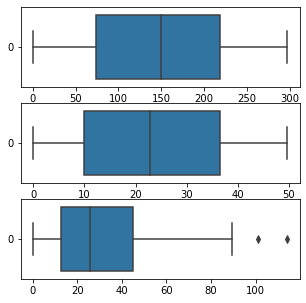

In [14]:
# Check for outliers
fig, ax = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(data=dataset['TV'], ax=ax[0], orient='h')
plt2 = sns.boxplot(data=dataset['Radio'], ax=ax[1], orient='h')
plt3 = sns.boxplot(data=dataset['Newspaper'], ax=ax[2], orient='h')

So there are not any significant outliers in the dataset.

## Data visualisation

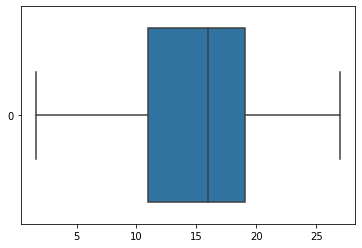

In [20]:
sns.boxplot(data=dataset['Sales'], orient='h')
plt.show()

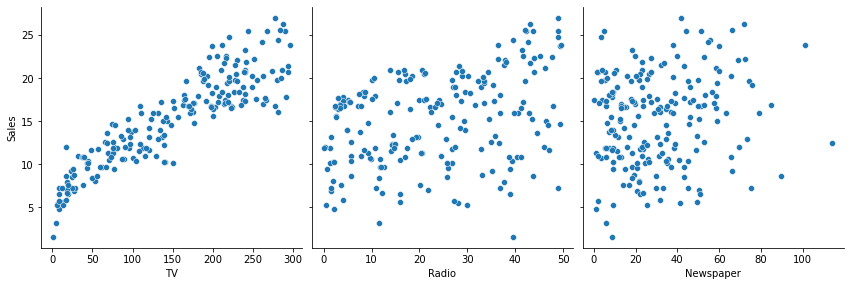

In [23]:
sns.pairplot(data=dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, kind='scatter')
plt.show()

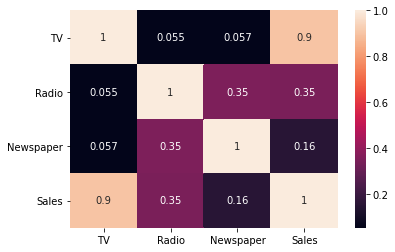

In [25]:
# Find correlation between different variables
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So TV can serve as a good feature for simple linear regression.

## Data pre-processing

In [30]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [31]:
# Split into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


## Model Training

### Linear Regression

In [200]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train[:, 0].reshape(-1, 1), y_train)

LinearRegression()

In [201]:
print(lr.coef_)
print(lr.intercept_)

[0.054538]
7.04765769764691


In [202]:
# Evaluate model performance
y_pred = lr.predict(X_test[:, 0].reshape(-1, 1))

In [203]:
idx = 15
print(f'Actual value = {y_test[idx]}, Predicted value = {y_pred[idx]:.2f}')

Actual value = 11.3, Predicted value = 10.82


In [204]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train[:, 0].reshape(-1, 1)), squared=False)
rmse_test_lr = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print(f'RMSE Training data = {rmse_train}')
print(f'RMSE Test data = {rmse_test_lr}')

RMSE Training data = 2.2699395580651056
RMSE Test data = 2.3515602424402635


In [205]:
r2_lr = lr.score(X_test[:, 0].reshape(-1, 1), y_test)
print(f'R^2 score for train set = {lr.score(X_train[:, 0].reshape(-1, 1), y_train)}')
print(f'R^2 score for test set = {r2_lr}')

R^2 score for train set = 0.8086430366702264
R^2 score for test set = 0.8205195772323056


#### Visualise the predictions on test

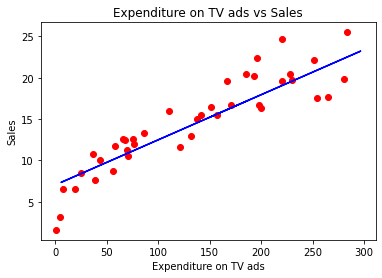

In [206]:
plt.scatter(X_test[:, 0].reshape(-1, 1), y_test, color='red')
plt.plot(X_train[:, 0].reshape(-1, 1), lr.predict(X_train[:, 0].reshape(-1, 1)), color='blue')
plt.title('Expenditure on TV ads vs Sales')
plt.xlabel('Expenditure on TV ads')
plt.ylabel('Sales')
plt.show()

### Support Vector Regression

In [207]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [208]:
# Evaluate model performance
y_pred = svr.predict(X_test)

In [209]:
idx = 20
print(f'Actual value = {y_test[idx]}, Predicted value = {y_pred[idx]:.2f}')

Actual value = 11.8, Predicted value = 10.62


In [210]:
rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train[:, 0].reshape(-1, 1)), squared=False)
rmse_test_svr = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print(f'RMSE Training data = {rmse_train}')
print(f'RMSE Test data = {rmse_test_svr}')

RMSE Training data = 2.2699395580651056
RMSE Test data = 2.1208242660237304


In [211]:
r2_svr = svr.score(X_test, y_test)
print(f'R^2 score for train set = {svr.score(X_train, y_train)}')
print(f'R^2 score for test set = {r2_svr}')

R^2 score for train set = 0.883723044578126
R^2 score for test set = 0.8540129833489196


### Decision Tree Regression

In [212]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [213]:
# Evaluate model performance
y_pred = dtr.predict(X_test)

In [214]:
idx = 15
print(f'Actual value = {y_test[idx]}, Predicted value = {y_pred[idx]:.2f}')

Actual value = 11.3, Predicted value = 10.90


In [215]:
rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train[:, 0].reshape(-1, 1)), squared=False)
rmse_test_dtr = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print(f'RMSE Training data = {rmse_train}')
print(f'RMSE Test data = {rmse_test_dtr}')

RMSE Training data = 2.2699395580651056
RMSE Test data = 1.598436736314578


In [216]:
r2_dtr = dtr.score(X_test, y_test)
print(f'R^2 score for train set = {dtr.score(X_train, y_train)}')
print(f'R^2 score for test set = {r2_dtr}')

R^2 score for train set = 1.0
R^2 score for test set = 0.9170730351654554


### Random Forest Regression

In [217]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=30)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [218]:
# Evaluate model performance
y_pred = rfr.predict(X_test)

In [219]:
idx = 22
print(f'Actual value = {y_test[idx]}, Predicted value = {y_pred[idx]:.2f}')

Actual value = 15.5, Predicted value = 13.54


In [220]:
rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train[:, 0].reshape(-1, 1)), squared=False)
rmse_test_rfr = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print(f'RMSE Training data = {rmse_train}')
print(f'RMSE Test data = {rmse_test_rfr}')

RMSE Training data = 2.2699395580651056
RMSE Test data = 1.42881730423763


In [221]:
r2_rfr = rfr.score(X_test, y_test)
print(f'R^2 score for train set = {rfr.score(X_train, y_train)}')
print(f'R^2 score for test set = {r2_rfr}')

R^2 score for train set = 0.9917600109066375
R^2 score for test set = 0.9337389569049129


### KNN Regression

In [222]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=2, metric='minkowski')
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [223]:
# Evaluate model performance
y_pred = knr.predict(X_test)

In [224]:
idx = 15
print(f'Actual value = {y_test[idx]}, Predicted value = {y_pred[idx]:.2f}')

Actual value = 11.3, Predicted value = 11.35


In [225]:
rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train[:, 0].reshape(-1, 1)), squared=False)
rmse_test_knr = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print(f'RMSE Training data = {rmse_train}')
print(f'RMSE Test data = {rmse_test_knr}')

RMSE Training data = 2.2699395580651056
RMSE Test data = 1.5122623780283628


In [226]:
r2_knr = knr.score(X_test, y_test)
print(f'R^2 score for train set = {rfr.score(X_train, y_train)}')
print(f'R^2 score for test set = {r2_knr}')

R^2 score for train set = 0.9917600109066375
R^2 score for test set = 0.9257734694163203


## Conclusion

In [227]:
mse = pd.DataFrame({ 'Model': ['LR', 'SVR', 'DT', 'RF', 'KNN'], 'Errors': [rmse_test_lr, rmse_test_svr, rmse_test_dtr, rmse_test_rfr, rmse_test_knr] })
mse

,Model,Errors
0,LR,2.351560
1,SVR,2.120824
2,DT,1.598437
3,RF,1.428817
4,KNN,1.512262


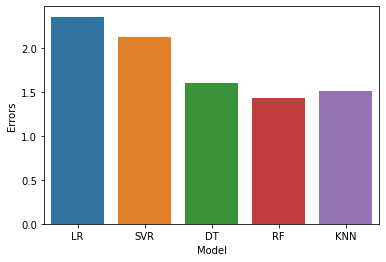

In [228]:
sns.barplot(x='Model', y='Errors', data=mse)
plt.show()

In [229]:
r2 = pd.DataFrame({ 'Model': ['LR', 'SVR', 'DT', 'RF', 'KNN'], 'Score': [r2_lr, r2_svr, r2_dtr, r2_rfr, r2_knr] })
r2

,Model,Score
0,LR,0.820520
1,SVR,0.854013
2,DT,0.917073
3,RF,0.933739
4,KNN,0.925773


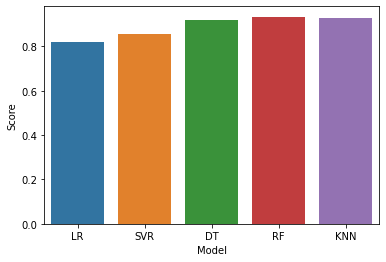

In [230]:
sns.barplot(x='Model', y='Score', data=r2)
plt.show()

Thus, Random Forest regression gives the best prediction, followed by KNN.